In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data(test_split=0.2, seed=113)

In [7]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (404, 13)
y_train shape: (404,)
X_test shape: (102, 13)
y_test shape: (102,)


array([[-0.47482083, -0.48335641, -0.42698208, ..., -0.33791894,
         2.26541184, -0.35370929],
       [-0.48320564,  0.08800509, -0.46929746, ..., -0.38155018,
         2.25488494, -0.46181782],
       [-0.44943333, -0.48335641, -0.35800316, ..., -0.34345941,
         2.11734264, -0.46077898],
       ...,
       [-0.48311637, -0.24096062, -0.44138731, ..., -0.36631387,
         2.02544001, -0.42912901],
       [-0.46847206, -0.48335641, -0.34775328, ..., -0.38155018,
         1.33080293, -0.37400128],
       [-0.48325675, -0.06782077, -0.46306442, ..., -0.37531715,
         2.12551484, -0.45302231]])

In [5]:
# Normalisation des donnees (Standard Scaler)

X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

In [15]:
# Architecture du model

model = keras.models.Sequential([
    keras.layers.Input((13,), name='Input_later'),
    keras.layers.Dense(64, activation='relu', name='Dense_n1'),
    keras.layers.Dense(64, activation='relu', name='Dense_n2'),
    keras.layers.Dense(64, activation='relu', name='Dense_n3'),
    keras.layers.Dense(1, name='Output')
])
model.compile(optimizer='adam',loss='mse',metrics=['mae', 'mse'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_n1 (Dense)             (None, 64)                896       
_________________________________________________________________
Dense_n2 (Dense)             (None, 64)                4160      
_________________________________________________________________
Dense_n3 (Dense)             (None, 64)                4160      
_________________________________________________________________
Output (Dense)               (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Entrainement du model
history = model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=1, validation_data=(X_test,y_test))

Epoch 1/50
21/21 [==============================] - 0s 13ms/step - loss: 554.9869 - mae: 21.6717 - mse: 554.9869 - val_loss: 88875.0859 - val_mae: 287.1329 - val_mse: 88875.0859
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 408.8798 - mae: 17.7692 - mse: 408.8798 - val_loss: 1755225.1250 - val_mae: 1289.2039 - val_mse: 1755225.1250
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 144.6974 - mae: 9.1252 - mse: 144.6974 - val_loss: 8110368.0000 - val_mae: 2787.8857 - val_mse: 8110368.0000
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 93.7149 - mae: 7.1918 - mse: 93.7149 - val_loss: 4538438.0000 - val_mae: 2097.7742 - val_mse: 4538438.0000
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 77.0563 - mae: 6.0717 - mse: 77.0563 - val_loss: 4554544.5000 - val_mae: 2108.3508 - val_mse: 4554544.5000
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 68.3453 - mae: 5.9225 - mse: 

In [17]:
score = model.evaluate(X_test, y_test, verbose=1)
print("X_test / loss :", score[0])
print("X_test / mae :", score[1])
print("X_test / mse :", score[2])

4/4 [==============================] - 0s 2ms/step - loss: 2719686.5000 - mae: 1623.7640 - mse: 2719686.5000
X_test / loss : 2719686.5
X_test / mae : 1623.7640380859375
X_test / mse : 2719686.5


In [18]:
df = pd.DataFrame(data=history.history)
display(df)

,loss,mae,mse,val_loss,val_mae,val_mse
0,554.986938,21.671740,554.986877,8.887509e+04,287.132935,8.887509e+04
1,408.879822,17.769169,408.879822,1.755225e+06,1289.203857,1.755225e+06
2,144.697418,9.125186,144.697418,8.110368e+06,2787.885742,8.110368e+06
3,93.714943,7.191778,93.714943,4.538438e+06,2097.774170,4.538438e+06
4,77.056267,6.071740,77.056267,4.554544e+06,2108.350830,4.554544e+06
5,68.345299,5.922524,68.345299,3.650672e+06,1888.791016,3.650672e+06
6,64.476158,5.492884,64.476158,3.536468e+06,1858.693604,3.536468e+06
7,63.170628,5.883171,63.170628,2.872884e+06,1674.619385,2.872884e+06
8,62.694916,5.520534,62.694916,3.171252e+06,1759.835327,3.171252e+06
9,61.282066,5.382198,61.282066,3.085708e+06,1736.367920,3.085708e+06


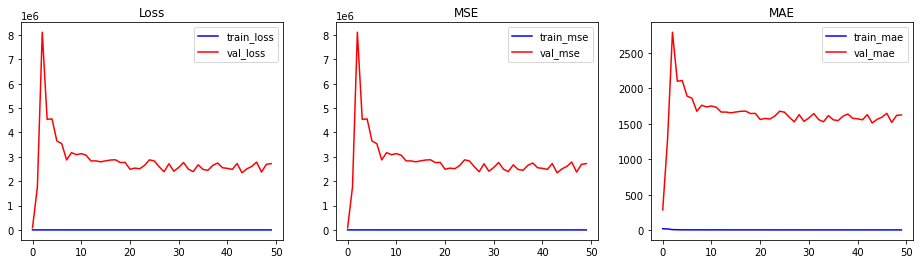

In [19]:
train_loss = history.history['loss']
train_mse = history.history['mse']
train_mae = history.history['mae']
val_loss = history.history['val_loss']
val_mae = history.history["val_mae"]
val_mse = history.history["val_mse"]

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.title("Loss")
plt.plot(train_loss, c='b', label='train_loss')
plt.plot(val_loss, c='r', label='val_loss')
plt.legend()

plt.subplot(132)
plt.title("MSE")
plt.plot(train_mse, c='b', label='train_mse')
plt.plot(val_mse, c='r', label='val_mse')
plt.legend()

plt.subplot(133)
plt.title("MAE")
plt.plot(train_mae, c='b', label='train_mae')
plt.plot(val_mae, c='r', label='val_mae')
plt.legend()
plt.show()
